# Universal Biology - Report on an Ideal Cell Model (金子)

### Jan BAUER
St. ID: 35-199805
##### jan.bauer@rwth-aachen.de

<sub>**A Jupyter notebook containing animations and interactive figures can be found at github.com/japhba/UB**

### NOTE: This report started out a time ago and is unfinished, largely in favor of the second report on Differentiation. As I however think that the second part of this report on a mechanism for cell division is no successful, but interesting approach, I thought I'd submit it anyway.
<br>

## Construct a model for an Ideal Cell
We want the cell to exhibit some of the features observed in experiment such as

- growth
- seperation at some point
- sensitivity to temperature
- etc...

The goal of the analysis is to find a model which is based on a preferably small set of parameters, to gain in some sense an insight to the mechanism governing cell growth.

## The passive cell

The first point that we're going to look at is the growth of the cell and formulate a purely passive model, that does not require any regulatory network. Assume that the cell is in a medium which can supply it with nutrients. 

We will call the abundance of the nutrient substance, normalized as a concentration,
\begin{align}
V &:= \text{total cell volume} \\
n &:= \frac{\text{number of nutrient molecules in cell}}{\text{cell volume}} \\
s &:= \frac{\text{number of salt molecules in cell}}{\text{cell volume}}.
\end{align}

As we want to formulate the cells dynamics in terms of concentrations, we have to take into account this process as well. Lets consider an amount of a substance $C$ and its concentration inside the cell, $c=C/V$. Then

\begin{align}
\frac{\partial C}{\partial t} &= \frac{\partial (cV)}{\partial t} \\
&= V\frac{\partial c}{\partial t} + c\frac{\partial V}{\partial t} \\
 \Rightarrow \dot c &= \frac{1}{V}\dot C - \frac{c}{V} \dot V \\
\end{align}


The simplest approach would be to assume that the cell grows by inflow of nutrients, which then increase the cell volume by water flowing in. The cell works in using the nutrient for creating an osmotic inbalance and take in water from the environment.

The first equation will constitute the growth of the cell due to osmotic inflow:
\begin{equation}
\dot V = \gamma_D(s_0-s)
\end{equation}

On the other hand, the concentration difference is proportional to the nutrient abundance inside the cell, assuming that there is a working process against the gradient, that is inhibited by the osmotic pressure:

\begin{equation}
\frac{\partial }{\partial t}(s-s_0) = \dot s = \gamma_n n - \gamma_p(s - s_0) - \frac{\dot V}{V} s.
\end{equation}

The last step will be the generation of the nutrient. Plants take up energy by converting electromagnetic radiation and carbon dioxide into sugar, expressed in very basic terms. This serves as the main nutrient for the plant. Such a photosynthesis process might be formulated as 
$$
\begin{equation}
\dot n = \gamma_\phi\phi - \gamma_c \dot s - \frac{\dot V}{V}n,
\end{equation}
$$
where the second term denotes the consumption of nutrient per concentration gradient change.   

Thus, we end up with a coupled system of equations.

*At this point, it would be good to check with the established results on cell models and compare whether the modeling needs to be improved or further simplifications can be made.*

### Implementation
As the system is heavily coupled, we give include here only the most basic skeleton of an algorithm. The code is found in `passiveCell.py`.

<IPython.core.display.Javascript object>


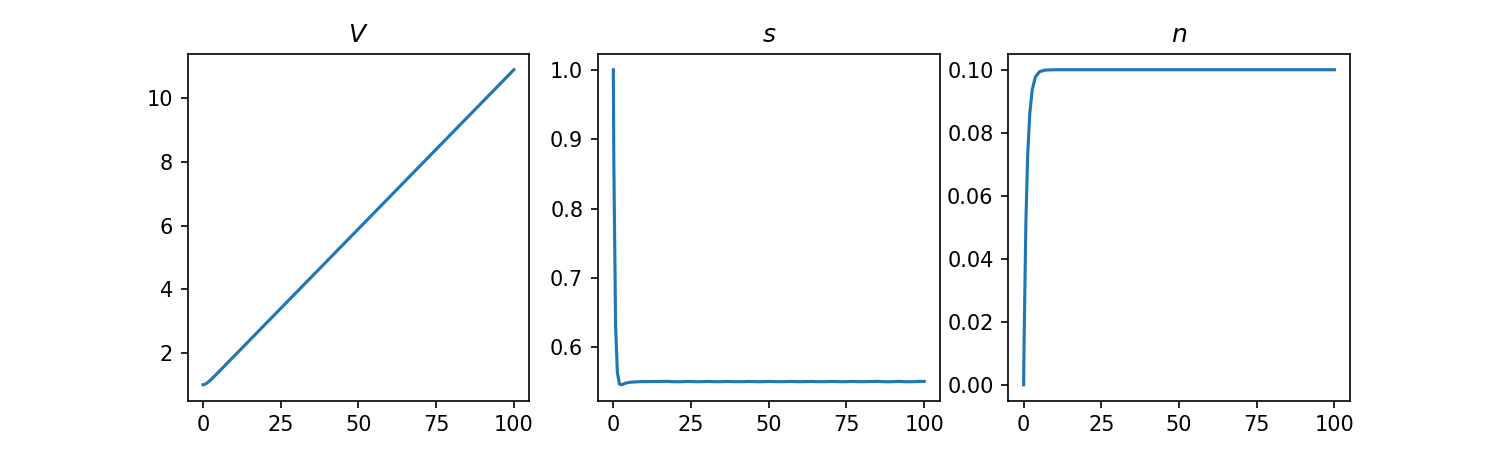

In [6]:
""" Implementation that assumes some terms to be constant """

%matplotlib notebook
from passiveCell import plotGraphs
plotGraphs()

## Mechanism for Cell Division
During the semester, I wondered if there is a mechanism which would lead cells to divide after they reach a certain size. Cell volume is a property with small variance, which raises the question how a characteristic size can be "measured" by the cell, at which it chooses to split. 

To model the mechanism of cell separation, we want to determine a mechanism by which the cell divides after reaching a certain size. 
For this to be realized, we need to find a variable \\(X\\) that *intrinsic*, that is is unaltered with the variation of the cell's growth,
\begin{equation}
\partial X / \partial V = 0
\end{equation}

Such a variable is for example given by the concentration \\(m\\) of the medium, which is the dominant in the cell compared to the other substances.
The road followed here will construct a mechanism for 'measuring' the cells volume by means of resonance, only depending on the medium's concentration. We will realize this by a reaction-diffusion-process.

The approach pursued here builds up on the idea of resonance: Similar to sound waves in a pipe, on a drum membrane or in the corpus of a viola, might it be possible that the cell eventually grows to a size where modes excited by certain environmental processes form resonating standing waves, which tear the cell apart.

What is the mechanism which creates that kind of waves in the system? Perhaps it is possible to take this to be essentially a sound wave, being reflected inside the cell, and carried by the cell medium, as sound waves can propagate through fluids like water without problems, as well.  

The mechanism is presented in the animation below for a one-dimensional cell.


<IPython.core.display.Javascript object>


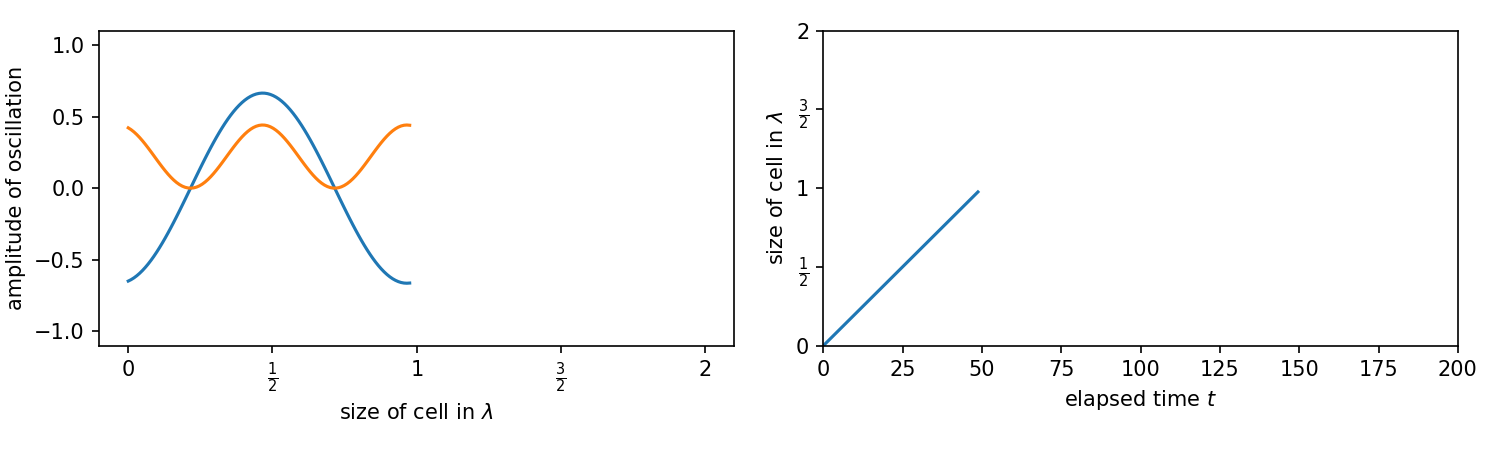

In [5]:
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.animation
import numpy as np

from resonance import resonance
ani = resonance()
plt.show(block = False)

<sub>**Figure 1:** Amplitude and its square for the standing wave inside the cell.

We will in the following make a rough estimation of the applicability of the model to actual cells and pursue the question whether it can be upheld under reasonable assumptions. 
We will specify all quantities in the SI system of units.

For cell division to occur, the wavelength of the sound wave should be of the order of magnitude of the cell's size, which is about a micrometer:
\begin{equation}
r = \lambda = 10^{-6}.
\end{equation}

The sound waves' oscillation frequency \\(f\\) is related via the dispersion relation
\begin{equation}
c = \lambda f,
\end{equation}
where $c$ is the propagation speed inside the medium.

For the frequency, consider a sphere of the cell's radius \\(r\\), that oscillates around its equilibrium size. For this, we need to assume that the cell wall is impenetrable for the oscillating substance and the substance itself does not interact with other molecules in the cell. The latter point is to be seen as a critical assumption, normally molecules, especially those of low density, are much more likely to interact with the dominant substance of the cell. We may therefore have to assume the oscillating substance to have high number density in the cell, which in presence of water conflicts with it being an Ideal Gas. *Here lies a major shortcoming of the model, I don't know if there are any mechanisms that could be taken as being reflected by the cell wall*.

The frequency is related to the stiffness \\(k\\) of the oscillation by
\begin{equation}
f = \frac{1}{2\pi}\sqrt{\frac{k}{m}},
\end{equation}
where \\(m = 10^{-15}\\) is the mass of the oscillating cell wall (REF).

We express \\(k\\) via the cell's isotherm compressibility
\begin{align}
k &= \frac{\partial F}{\partial r} \\
&= \frac{\partial p}{\partial r}A \\
&= \frac{10^5}{10\%\cdot r}4\pi r^2 \\
&= {10^6}\cdot 4\pi r.
\end{align}

Altogether this gives for \\(c\\)
\begin{align}
c 
  &= \lambda\frac{1}{2\pi}\sqrt{\frac{k}{m}} \\
  &= \lambda\frac{1}{2\pi}\sqrt{\frac{\partial p}{\partial r}\frac{A}{m}} \\ \\
  &= \lambda\frac{1}{2\pi}\sqrt{\frac{10^5}{10\%\cdot 10^{-6}}\frac{4\pi(10^{-6})^2}{10^{-15}}} \\
  &= 10^{-6} \frac{1}{2\pi}\sqrt{\frac{4\pi}{10^{-15}}} \\
  &= 10^{-6} \frac{1}{2\pi} 10^{7} \\
  &= 1.\\
\end{align}
This is by around two orders of magnitude smaller than the speed of sound with which we are usually familiar in air. However, it is imaginable that there may be combinations of cell size, wall stiffness and wall mass that fall into a more realistic range. Note that for the calculation a three dimensional system was assumed, a two dimensional cell might be possible on a surface as well.

### Applicability
The above model was constructed in the opposite way as might be sensible for modeling: The interesting and physically relevant phenomenon of resonance was tried to force onto the cell without a lot of prior biological inspiration. Upon a rough calculation that rely on constants like the cell walls mass which was not easily looked up, this model with this mechanism seems to be unsuitable for explaining the fixed size at which a cell divides. It would however be interesting if there is another mechanism more suitable than the gas theoretical approach undertaken here that might show a resonance phenomenon.

#### Note on harmonic functions

Extending the one dimensional considerations from above to the three dimensional, real world case, the stable modes of the cell under reflections are those who fulfil Laplace's equation
\begin{align}
\nabla^2 \psi = 0,
\end{align}
because their absolute square is invariant under time evolution. To see this, we can consider that the propagation of waves in the medium is described by the wave equation
\begin{align}
\frac{1 }{c^2} \frac{\partial \psi}{\partial t} - \nabla^2 \psi &= 0 \\
\Rightarrow \frac{1 }{c^2} \frac{\partial \psi}{\partial t}  &= \nabla^2 \psi,
\end{align}

so that a harmonic function is indeed a stationary solution.

In three dimensions, this problem is identical to finding the eigenfunctions of the Hydrogen atom. We can then imagine the modes to be corresponding to different wavelengths. For two dimensions, a similar emerging pattern can be seen in form of Chladni's figures in music, although here other other boundary conditions apply.